In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### Read file with bench data <br>

Columns info: <br>
**Total** - total number of employees <br>
**Bench** - number of employees on bench <br>
**Date** - date of data gathering <br>
**Item** - employee's skill <br>

In [2]:
df = pd.read_csv('./data/dummy.csv',delimiter=',')
df.head(3)

,Total,Bench,Date,Item
0,1500,78,06/01/23,DummySkill1
1,213,59,06/01/23,DummySkill2
2,219,36,06/01/23,DummySkill3


## Get data about bench in Dummy company using Pandas and Matplotlib.

### Add column for Bench Percent

In [3]:
df['Bench Percent'] = round(df.Bench / df.Total * 100, 2)
df.head(3)

,Total,Bench,Date,Item,Bench Percent
0,1500,78,06/01/23,DummySkill1,5.20
1,213,59,06/01/23,DummySkill2,27.70
2,219,36,06/01/23,DummySkill3,16.44


### Convert Date column to Date format

In [4]:
df.Date = pd.to_datetime(df.Date, dayfirst=True).dt.date
df.head(3)

,Total,Bench,Date,Item,Bench Percent
0,1500,78,2023-01-06,DummySkill1,5.20
1,213,59,2023-01-06,DummySkill2,27.70
2,219,36,2023-01-06,DummySkill3,16.44



### Get only Bench related columns

In [5]:
selected = df[['Bench Percent', 'Date', 'Item']]
selected.head(3)

,Bench Percent,Date,Item
0,5.20,2023-01-06,DummySkill1
1,27.70,2023-01-06,DummySkill2
2,16.44,2023-01-06,DummySkill3


### Group table by Primary Skill of employees

In [6]:
grouped = selected.groupby('Item')

### Create subplots for each Primary Skill

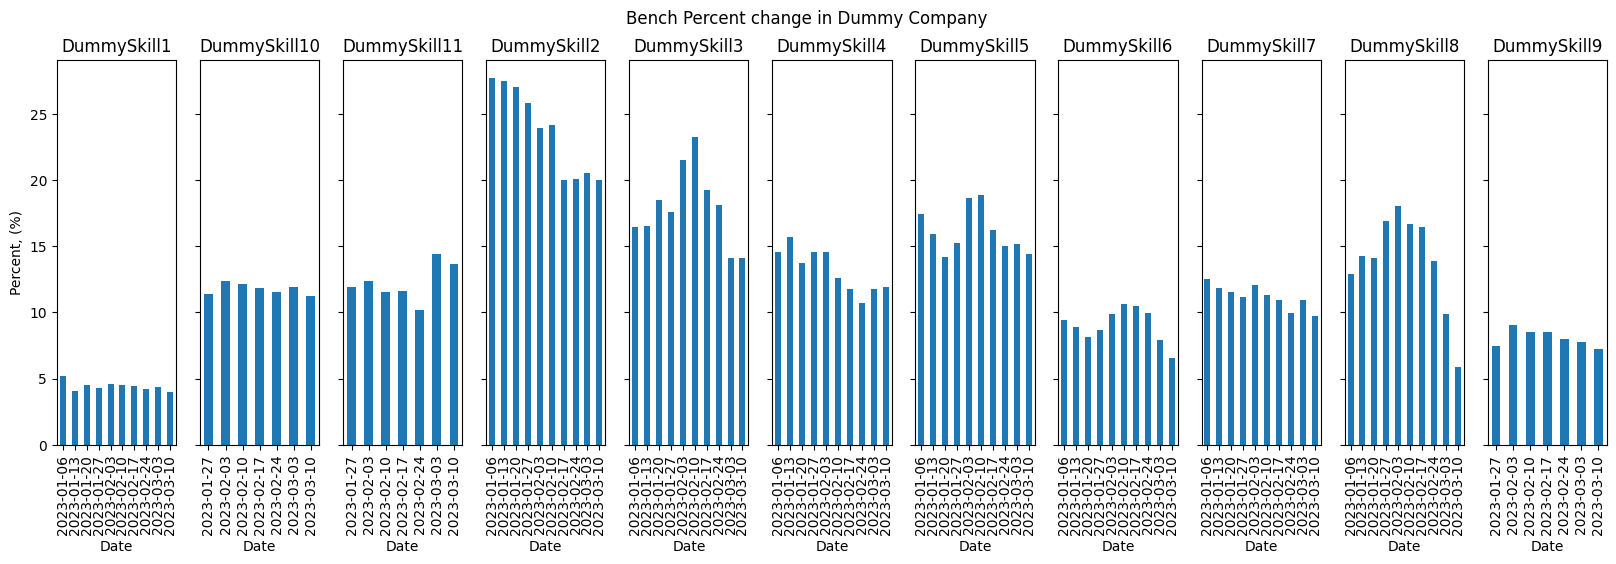

In [7]:
# Get the number of subplots based on the number of groups
n_subplots = len(grouped)

# Create the subplots
fig, axs = plt.subplots(1, n_subplots, figsize=(20, 5), sharey=True)

# Add title to all subplots
fig.suptitle('Bench Percent change in Dummy Company')

# Iterate through the groups and plot the data
for i, (key, selected) in enumerate(grouped):
    selected.plot.bar(x='Date', y='Bench Percent', ax=axs[i], legend=False, ylabel='Percent, (%)')
    axs[i].set_title(key)

# Save the plot into file
plt.savefig('./Bench.png', format='png')

# Show the plot
plt.show()

## Get data about change in the number of employees in Dummy Company relative to the previous week

### Group data by primary skills and add column that contains difference between current and previous week employee number

In [8]:
df = df.groupby('Item', group_keys=True).apply(lambda x: x.sort_values('Date')).reset_index(drop=True)
df['Diff'] = df.groupby('Item')['Total'].diff()
fired_selected = df[df.Item != 'Global'][['Total', 'Date', 'Item', 'Diff']]
fired_selected = fired_selected.fillna(0)
fired_selected.head(3)

,Total,Date,Item,Diff
0,1500,2023-01-06,DummySkill1,0.0
1,1480,2023-01-13,DummySkill1,-20.0
2,1460,2023-01-20,DummySkill1,-20.0


### Create subplots for each primary skill

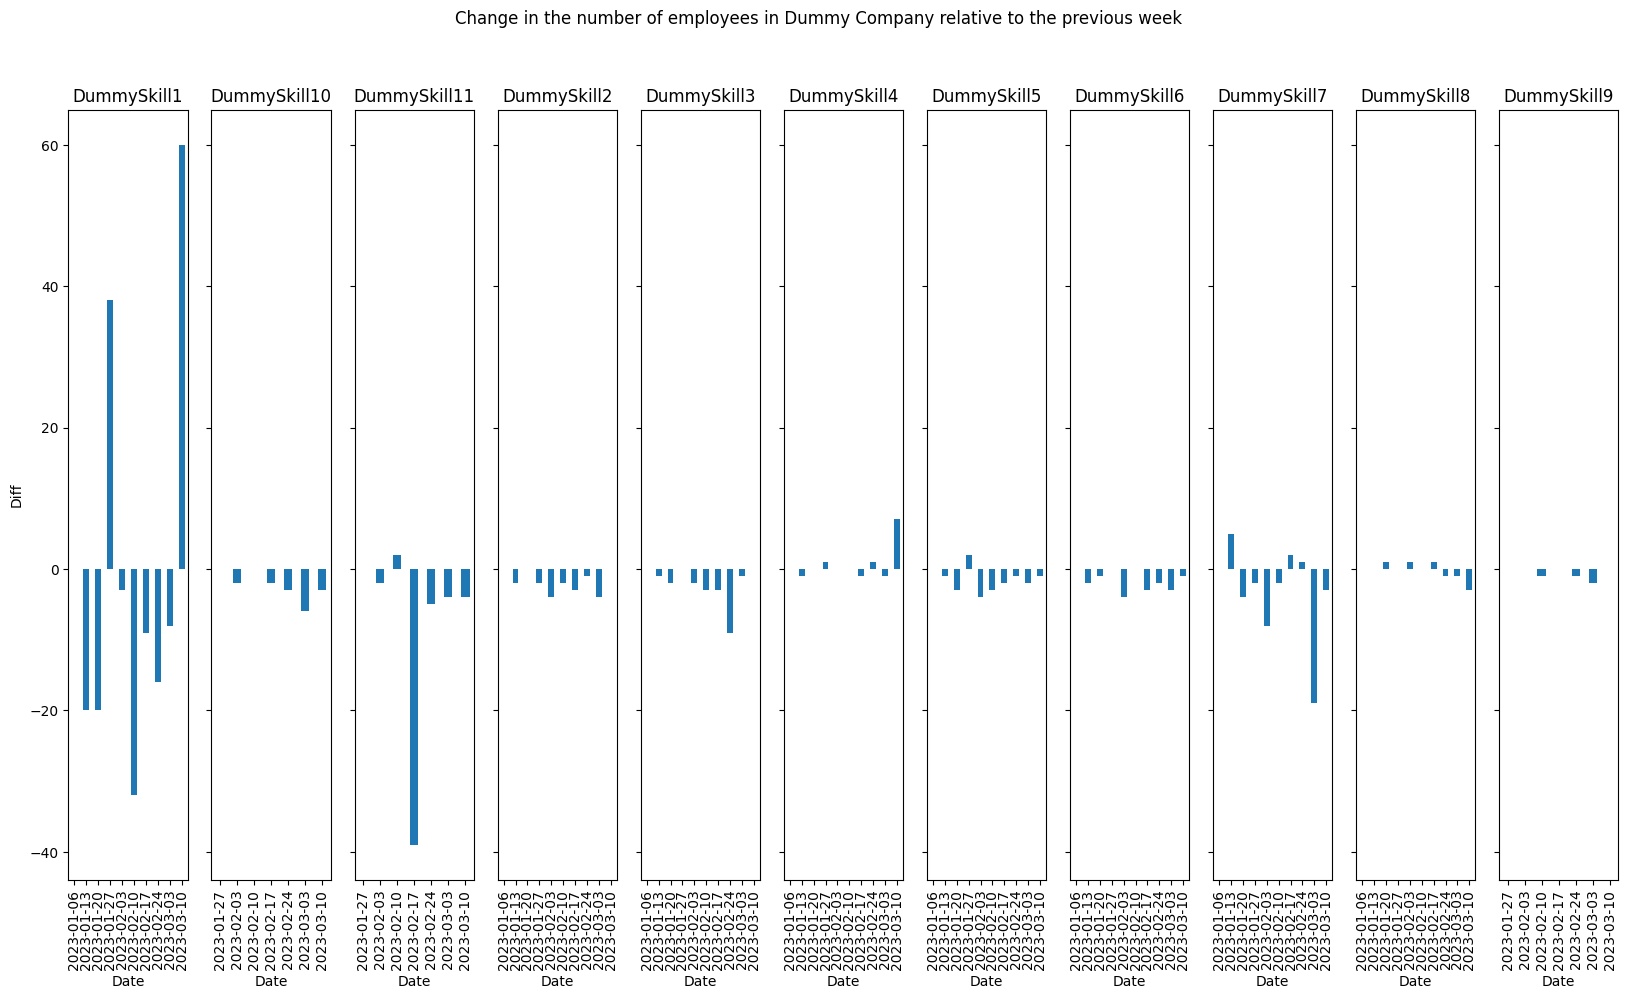

In [9]:
groups = fired_selected.groupby('Item')

# Get the number of subplots based on the number of groups
n_subplots = len(groups)

#Create the subplots
fig, axs = plt.subplots(1, n_subplots, figsize=(20, 10), sharey=True)

# Add title to all subplots
fig.suptitle('Change in the number of employees in Dummy Company relative to the previous week')

# Iterate through the groups and plot the data
for i, (name, group) in enumerate(groups):
    group.plot.bar(x='Date', y='Diff', ax=axs[i], legend=False, ylabel='Diff')
    axs[i].set_title(name)

# Save the plot into file
plt.savefig('./Employee_Number_Change_For_Each_Previous_Week.png', format='png')

# Show the plot
plt.show()

## Get data about layoffs in Dummy Company relative to the amount at the start date of data collection

### Since the data for different skills was collected in different time:

In [10]:
data_collected_since_06_01 = [
    'DummySkill1',
    'DummySkill2',
    'DummySkill3',
    'DummySkill4',
    'DummySkill5', 
    'DummySkill6',
    'DummySkill7',
    'DummySkill8'
]


### For data that was collected since 06/01

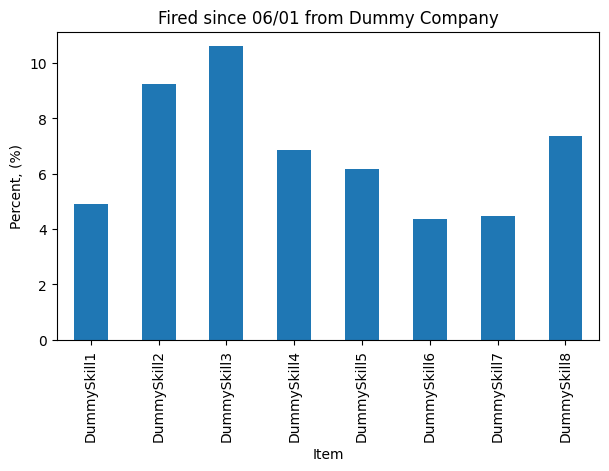

In [11]:
# Get and group only data that was collected since 06/01
fired_since_06_01 = df[df.Item.isin(data_collected_since_06_01)][['Total', 'Date', 'Item']]
fired_grouped_since_06_01 = fired_since_06_01.groupby('Item')

# Transfrom into percent of fired employees for each skills
fired_since_06_01 = round(((fired_grouped_since_06_01.Total.min() - fired_grouped_since_06_01.Total.max())/ fired_grouped_since_06_01.Total.min() * 100), 2).abs()

# Create and save the plot
fired_since_06_01.plot(kind='bar', title='Fired since 06/01 from Dummy Company', ylabel='Percent, (%)', figsize=(7, 4))
plt.savefig('./Fired_Since_06_01.png', format='png') 

### For data that was collected since 27/01

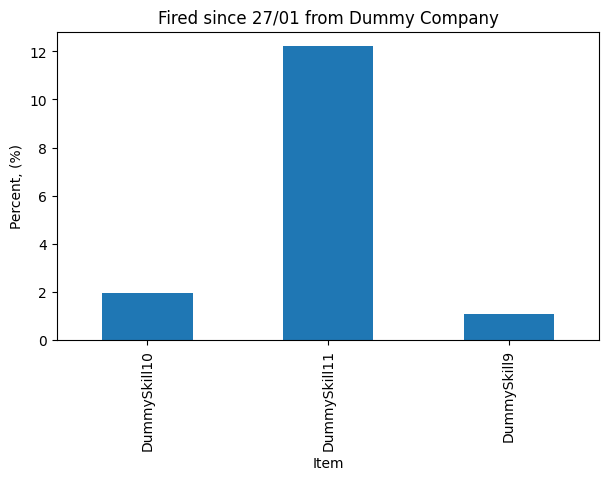

In [12]:
# Get and group only data that was collected since 27/01
fired_since_27_01 = df[~df.Item.isin(data_collected_since_06_01)][['Total', 'Date', 'Item']]
fired_grouped_since_27_01 = fired_since_27_01.groupby('Item')

# Transfrom into percent of fired employees for each skills
fired_since_27_01 = round(((fired_grouped_since_27_01.Total.min() - fired_grouped_since_27_01.Total.max())/ fired_grouped_since_27_01.Total.min() * 100), 2).abs()

# Create and save the plot
fired_since_27_01.plot(kind='bar', title='Fired since 27/01 from Dummy Company', ylabel='Percent, (%)', figsize=(7, 4))
plt.savefig('./Fired_Since_27_01.png', format='png') 